In [2]:
from spherecluster import SphericalKMeans

%matplotlib inline
import scipy.io as io
from sklearn.metrics import (adjusted_rand_score as ari,
                             normalized_mutual_info_score as nmi)
from coclust.coclustering import CoclustInfo
from coclust.evaluation.external import accuracy
from coclust.visualization import plot_delta_kl, plot_convergence
from tqdm import tqdm
import numpy as np
import seaborn as sns
import pandas as pd

import pickle
from scipy.sparse import csr_matrix

In [3]:
# Retrieve the Classic3  document-term matrix from a matlab file
file_name = "./datasets/classic4.mat"
matlab_dict = io.loadmat(file_name)

In [4]:
X = matlab_dict['mat']
true_row_labels = matlab_dict['labels'].flatten()

In [5]:
models_file = 'classic4_models.pkl'

In [6]:
def create_coassociation_matrix(labels):
    rows = [] 
    cols = []
    unique_labels = set(labels) 
    for label in unique_labels:
        # retourne l'indice des indivues d'un mm cluster
        indices = np.where(labels == label)[0]
        for index1 in indices:
            for index2 in indices:
                rows.append(index1)
                cols.append(index2)
    data = np.ones((len(rows),)) 
    return csr_matrix((data, (rows, cols)), dtype='float')

In [8]:
pkl_file = open(models_file, 'rb')
models = pickle.load(pkl_file)
pkl_file.close()

In [11]:
best_models = models[1:7]

In [13]:
dim_comatrix = X.shape[0]
total_comatrix = np.zeros((dim_comatrix,dim_comatrix)) 

In [18]:
for m in best_models:
    labels = np.array(m.row_labels_)
    comatrix_m = create_coassociation_matrix(labels)
    total_comatrix += comatrix_m

(7094, 7094)
(7094, 7094)
(7094, 7094)
(7094, 7094)
(7094, 7094)
(7094, 7094)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

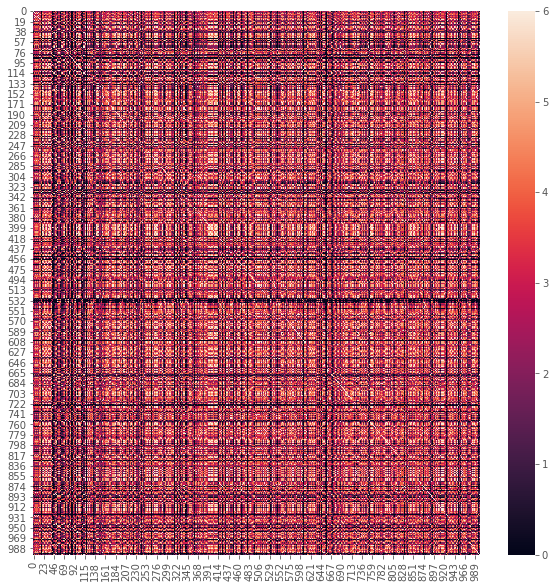

In [22]:
plt.subplots(figsize=(10,10))
sns.heatmap(total_comatrix[:1000, :1000])

In [26]:
n_cluster = 3
co = CoclustInfo(n_row_clusters=n_cluster, n_col_clusters=n_cluster)

In [28]:
co.fit(total_comatrix)

CoclustInfo(init=None, max_iter=20, n_col_clusters=3, n_init=1,
      n_row_clusters=3, random_state=None, tol=1e-09)

In [29]:
predicted_row_labels = np.array(m.row_labels_)
print(co.criterion)

print(nmi(true_row_labels, predicted_row_labels),
      ari(true_row_labels, predicted_row_labels),
      accuracy(true_row_labels, predicted_row_labels))

0.40194636373062476
(0.6491728706690921, 0.4711436636445095, 0.6041725401747956)
